In [54]:
#Common Libs
import numpy as np
import pandas as pd

#Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#prerpocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

#Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

#Models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

#tuning
from sklearn.model_selection import cross_val_score

#ensemble
from sklearn.ensemble import RandomForestRegressor

#XGboost
from xgboost import XGBRegressor

#Metric
from sklearn.metrics import mean_squared_error

In [55]:
diamonds_train = pd.read_csv('train.csv')
diamonds_train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


#  ` EDA `

In [56]:
diamonds_train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


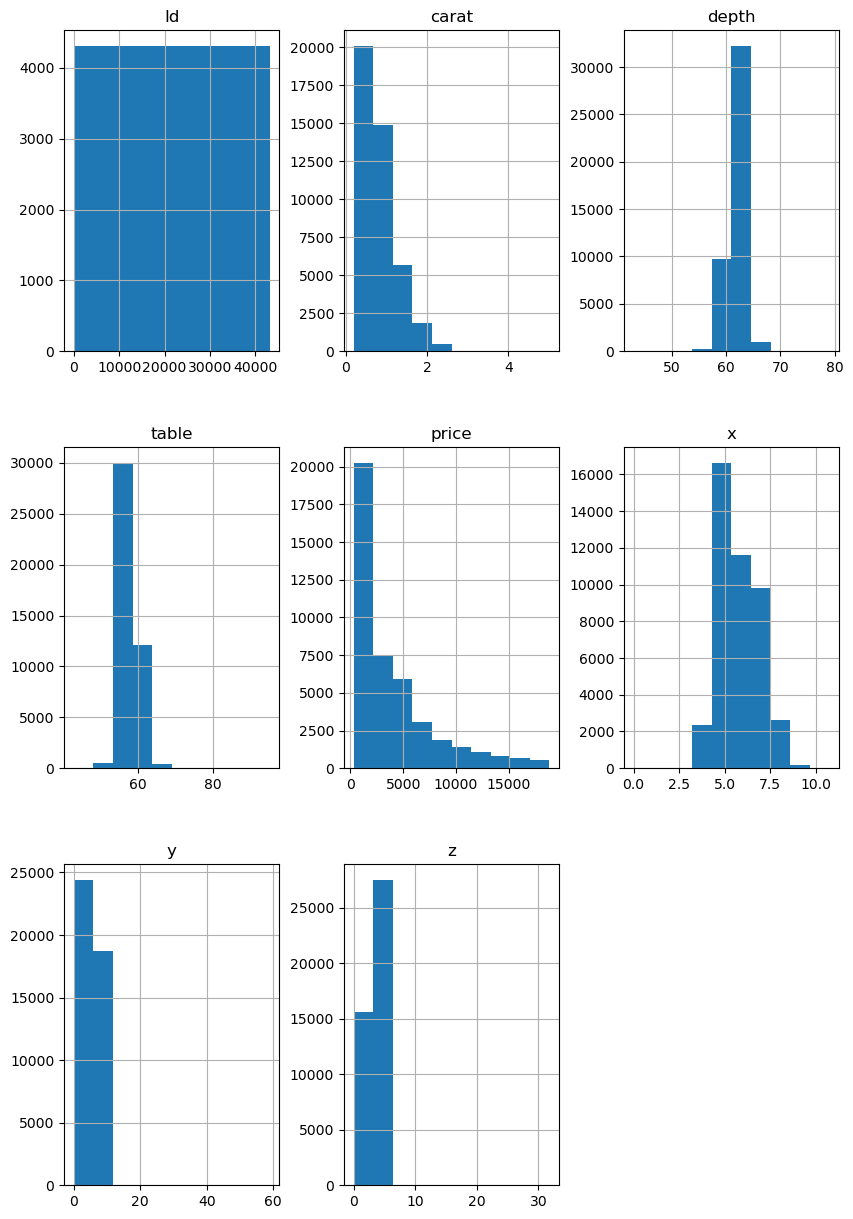

In [57]:
diamonds_train.hist(bins = 10, figsize = (10, 15))
plt.show()

## cut

In [58]:
# info about cut
diamonds_train['cut'].value_counts()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

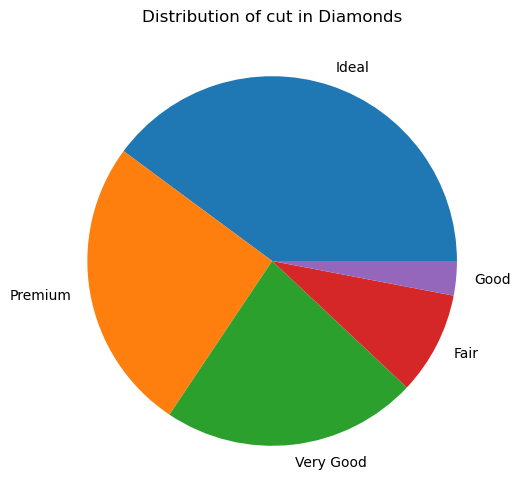

In [59]:
# cut dist
plt.figure(figsize=(10, 6))
plt.pie(diamonds_train['cut'].value_counts(), labels = diamonds_train['cut'].unique())
plt.title('Distribution of cut in Diamonds')
plt.show()

## color

In [60]:
diamonds_train['color'].value_counts()

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

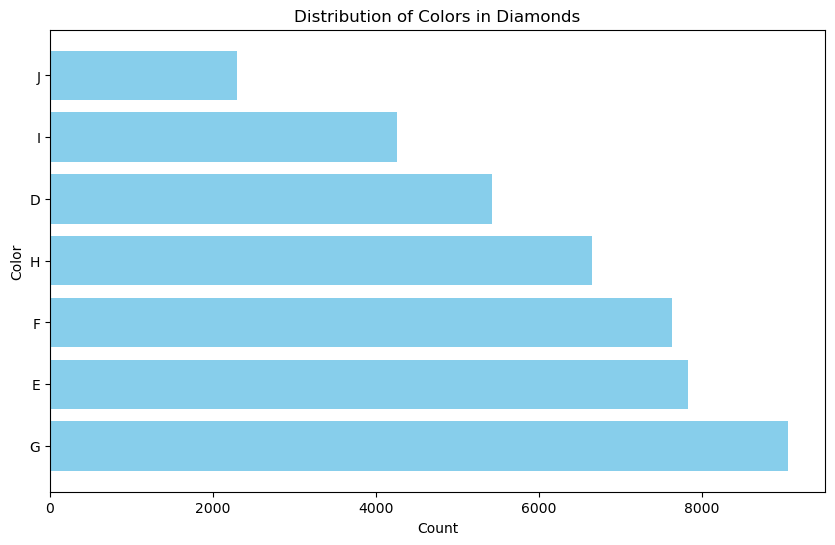

In [61]:
color_values = diamonds_train['color'].value_counts().index
color_counts = diamonds_train['color'].value_counts().values

plt.figure(figsize=(10, 6))
plt.barh(color_values, color_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Color')
plt.title('Distribution of Colors in Diamonds')
plt.show()

## Clarity

In [62]:
diamonds_train['clarity'].value_counts()

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64

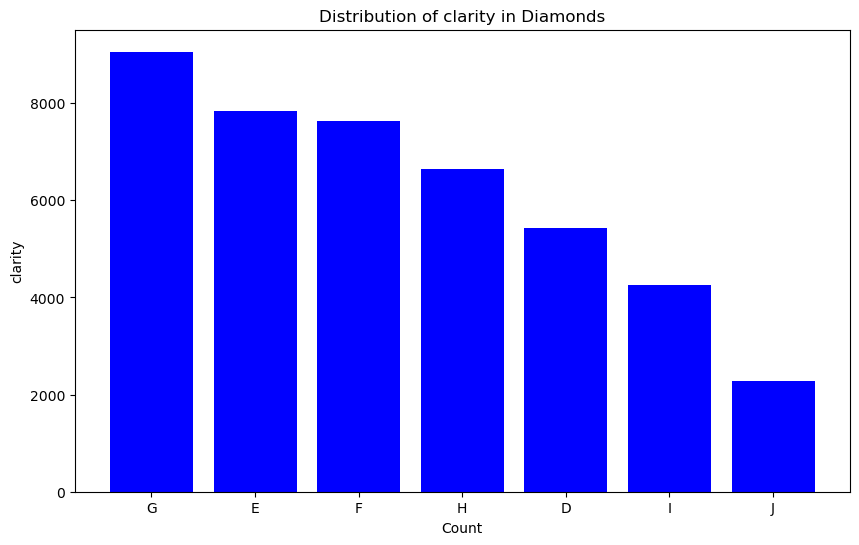

In [63]:
clarity_values = diamonds_train['clarity'].value_counts().index
clarity_counts = diamonds_train['clarity'].value_counts().values

plt.figure(figsize=(10, 6))
plt.bar(color_values, color_counts, color='blue')
plt.xlabel('Count')
plt.ylabel('clarity')
plt.title('Distribution of clarity in Diamonds')
plt.show()

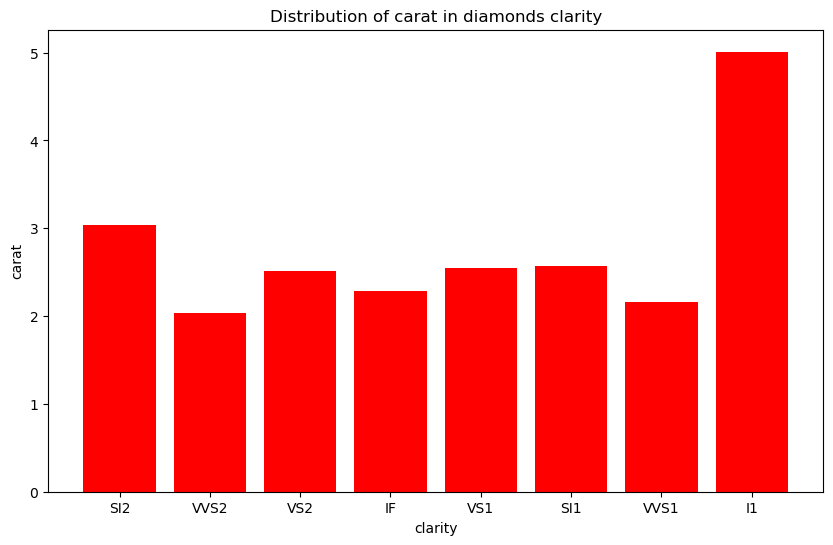

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(diamonds_train['clarity'], diamonds_train['carat'], color='red')
plt.xlabel('clarity')
plt.ylabel('carat')
plt.title('Distribution of carat in diamonds clarity')
plt.show()

## Price

the min price is: 326
the max price is: 18823


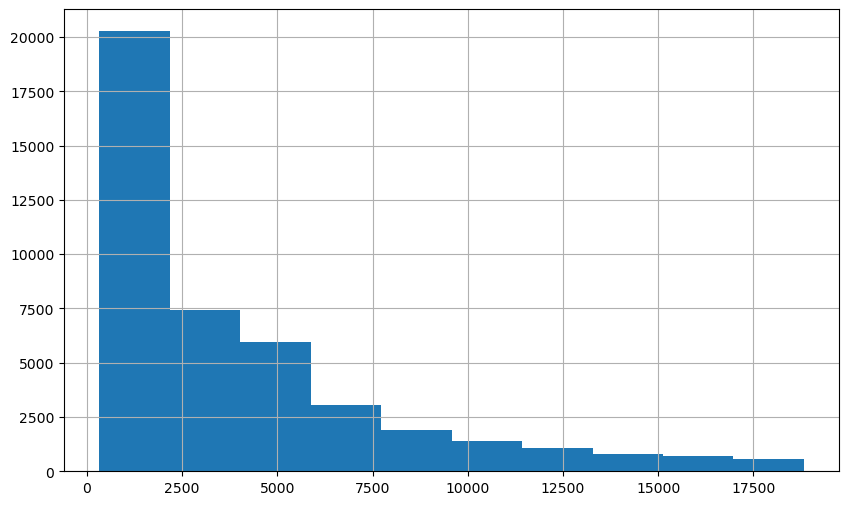

In [65]:
print('the min price is:', diamonds_train['price'].min())
print('the max price is:', diamonds_train['price'].max())


plt.figure(figsize=(10, 6))
diamonds_train['price'].hist(bins = 10)
plt.show()

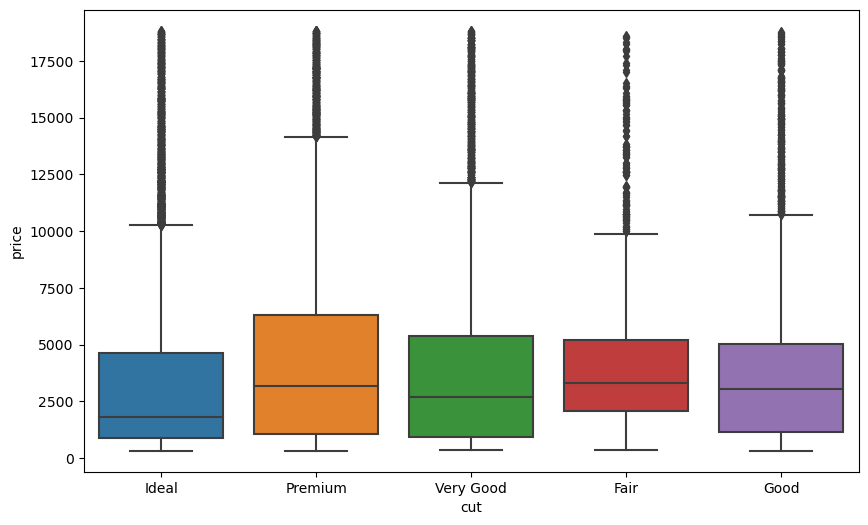

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds_train)
plt.show()

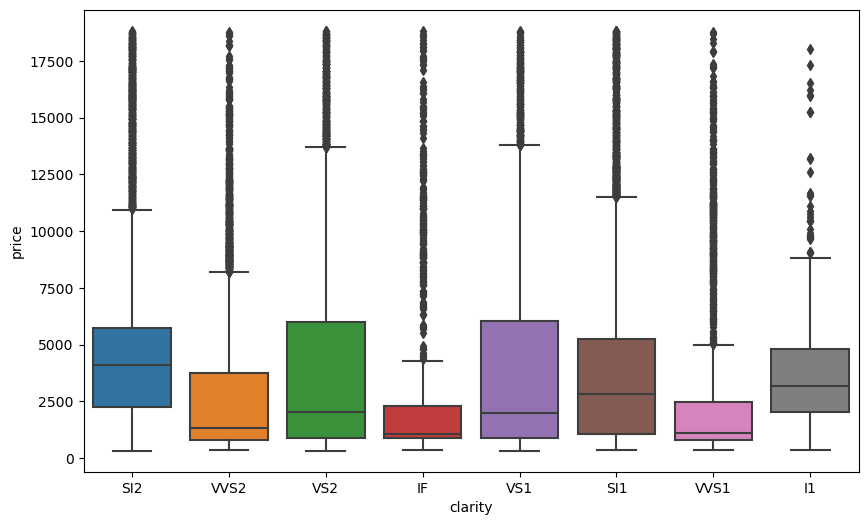

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=diamonds_train)
plt.show()

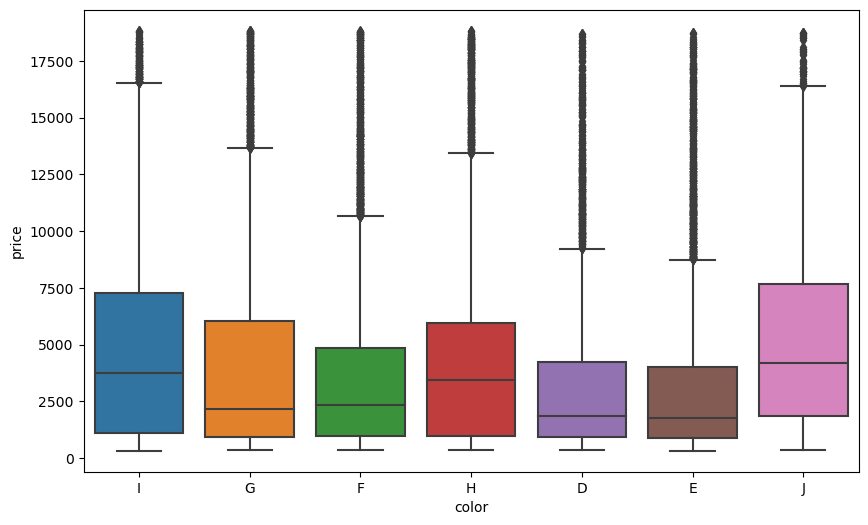

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=diamonds_train)
plt.show()

<Axes: >

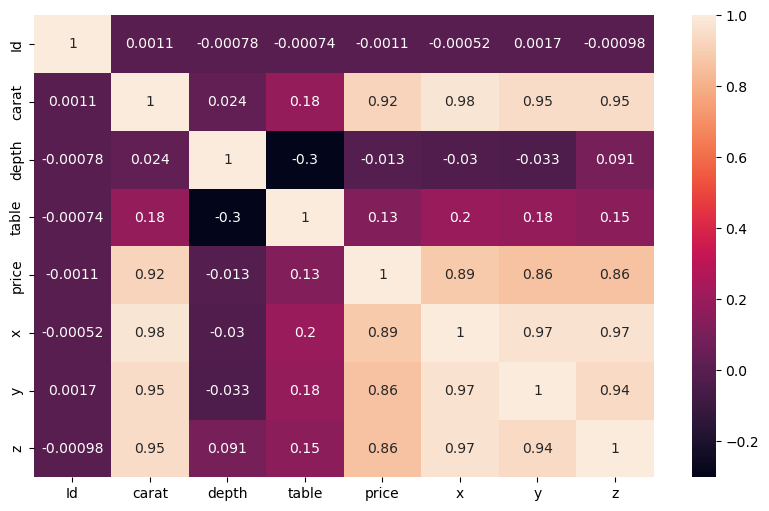

In [69]:
diamonds_corr = diamonds_train.drop(columns = ['cut', 'clarity', 'color'], axis = 1).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(diamonds_corr, annot = True)

# Preprocessing 

In [70]:
diamonds_train = diamonds_train.drop('Id', axis = 1)
diamonds_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [71]:
diamonds_train['x'].min()

0.0

In [72]:
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
diamonds_train = diamonds_train[(diamonds_train[columns_to_check] != 0).all(axis=1)]

In [73]:
diamonds_train['x'].min()

3.73

In [74]:
diamonds_train.describe()

,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Feature Engineering

In [75]:
diamonds_train['avg_dimintion'] = diamonds_train[['x', 'y', 'z']].mean(axis = 1)
diamonds_train['volume'] = diamonds_train['x'] * diamonds_train['y'] * diamonds_train['z']
diamonds_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,avg_dimintion,volume
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,5.746667,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,6.436667,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,3.850000,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,4.533333,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,4.993333,115.315200


array([[<Axes: title={'center': 'volume'}>,
        <Axes: title={'center': 'avg_dimintion'}>]], dtype=object)

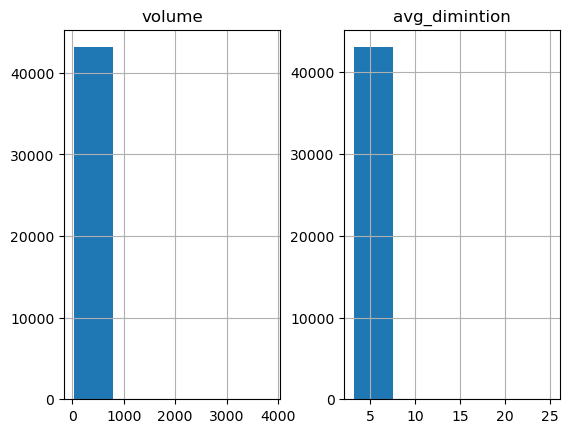

In [76]:
diamonds_train[['volume', 'avg_dimintion']].hist(bins = 5)

In [77]:
diamonds_train[diamonds_train['volume'] > 1000]

,carat,cut,color,clarity,depth,table,price,x,y,z,avg_dimintion,volume
35359,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,25.016667,3840.59806


In [78]:
diamonds_train[diamonds_train['avg_dimintion'] > 15]

,carat,cut,color,clarity,depth,table,price,x,y,z,avg_dimintion,volume
35359,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,25.016667,3840.59806


In [79]:
diamonds_train = diamonds_train.drop(diamonds_train[diamonds_train['avg_dimintion'] > 15].index, axis = 0)

In [80]:
diamonds_train[diamonds_train['avg_dimintion'] > 15]

,carat,cut,color,clarity,depth,table,price,x,y,z,avg_dimintion,volume


In [83]:
diamonds_train = diamonds_train.drop(columns = ['x', 'y', 'z'], axis = 1)
diamonds_train.head()

,carat,cut,color,clarity,depth,table,price,avg_dimintion,volume
0,1.06,Ideal,I,SI2,61.8,57.0,4270,5.746667,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,15164,6.436667,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,828,3.850000,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,4.533333,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,4.993333,115.315200


# Training for all data 

# Prepare the pipeline

In [84]:
num = [col for col in diamonds_train.columns if diamonds_train[col].dtype!=object]
num = [x for x in num if x != 'price']
num

['carat', 'depth', 'table', 'avg_dimintion', 'volume']

In [85]:
cat = [col for col in diamonds_train.columns if diamonds_train[col].dtype==object]
cat

['cut', 'color', 'clarity']

In [86]:
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num)),    ## select only these columns
                    ('scaler', StandardScaler())])

In [87]:
categ_pipeline = Pipeline(steps=[
                    ('selector', DataFrameSelector(cat)),    ## select only these columns
                    ('LE', OrdinalEncoder())])

In [88]:
full_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])


## Splitting data

In [89]:
X_train = diamonds_train.drop('price', axis = 1)
y_train = diamonds_train['price']

In [90]:
X_train = full_pipeline.fit_transform(X_train)

In [91]:
X_train

array([[ 0.55452259,  0.03661808, -0.20503975, ...,  2.        ,
         5.        ,  3.        ],
       [ 1.50531456, -0.59054859,  0.24270812, ...,  3.        ,
         3.        ,  7.        ],
       [-1.00900197, -0.31180785, -0.65278761, ...,  2.        ,
         2.        ,  5.        ],
       ...,
       [-0.75545744, -0.17243747,  0.24270812, ...,  3.        ,
         5.        ,  6.        ],
       [-1.03013068, -1.07834489,  0.24270812, ...,  3.        ,
         1.        ,  4.        ],
       [-0.98787325, -0.38149303, -1.10053547, ...,  2.        ,
         3.        ,  5.        ]])

# Models

## RFR

In [92]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
# RMSE
prediction = RFR.predict(X_train)
mse_RFR = mean_squared_error(y_train, prediction)
rmse_RFR = np.sqrt(mse_RFR)
rmse_RFR

208.24013192399107

In [94]:
# cv for RFR
scores_RFR = cross_val_score(RFR, X_train, y_train, scoring ="neg_mean_squared_error",cv = 5)
rmse_scores_RFR = np.sqrt(-scores_RFR)
rmse_scores_RFR

array([570.07044125, 565.07374344, 578.85206892, 550.74428189,
       559.13626897])

In [95]:
print('RFR score:', rmse_scores_RFR.mean())

RFR score: 564.7753608935666


# Fine Tuning For RFR

In [96]:
# Grid search for RandomForestRegressor

param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}
]

rand_reg = RandomForestRegressor(random_state = 42)
grid_search = GridSearchCV(rand_reg, param_grid, cv= 5, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [97]:
grid_search.best_score_

-326370.0283946358

# XGboost 

In [47]:
XGb = XGBRegressor()
XGb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
# RMSE
prediction = XGb.predict(X_train)
mse_XGb = mean_squared_error(y_train, prediction)
rmse_XGb = np.sqrt(mse_XGb)
rmse_XGb

399.69243098373994

# Sub

In [98]:
diamonds_test = pd.read_csv('test.csv')
diamonds_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [99]:
diamonds_test['avg_dimintion'] = diamonds_test[['x', 'y', 'z']].mean(axis = 1)
diamonds_test['volume'] = diamonds_test['x'] * diamonds_test['y'] * diamonds_test['z']
diamonds_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z,avg_dimintion,volume
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75,3.916667,55.686400
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58,5.000000,116.719456
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05,4.253333,71.889720
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65,5.256667,134.037855
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92,4.153333,66.435840


In [100]:
ID=diamonds_test['Id']
ID

0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10788, dtype: int64

In [101]:
diamonds_test = full_pipeline.fit_transform(diamonds_test.drop(columns = ['x', 'y', 'z', 'Id'], axis = 1))

In [102]:
diamonds_test

array([[-0.96342224, -0.46321052, -0.20230891, ...,  2.        ,
         3.        ,  7.        ],
       [-0.18558493,  0.66259865,  0.24475238, ...,  3.        ,
         1.        ,  5.        ],
       [-0.75319594,  0.73296173, -0.64937019, ...,  4.        ,
         5.        ,  4.        ],
       ...,
       [-0.18558493,  0.38114636, -1.09643147, ...,  2.        ,
         1.        ,  6.        ],
       [ 0.65532028, -0.5335736 ,  1.13887494, ...,  3.        ,
         1.        ,  3.        ],
       [ 2.52633435, -0.18175823,  0.69181366, ...,  3.        ,
         2.        ,  3.        ]])

In [103]:
price=grid_search.predict(diamonds_test)
data={'ID':ID,'price':price}
sub=pd.DataFrame(data)

In [104]:
sub

,ID,price
0,1,808.600000
1,2,2974.500000
2,3,973.258333
3,4,2802.200000
4,5,1073.000000
...,...,...
10783,10784,1838.366667
10784,10785,6585.800000
10785,10786,4614.866667
10786,10787,4729.000000


In [105]:
sub.to_csv('sub.csv',index=False)